<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    54.266279  49.846687  ...  123.688225  -83.973739
      1.0    79.278513  73.611907  ...  261.892671  302.474572
      2.0    89.458052  81.226335  ...  282.339412   19.869080
      3.0    22.100758  96.049180  ...  181.796721 -302.220921
      4.0    90.533637  67.361013  ...  267.739061 -315.105811
...                ...        ...  ...         ...         ...
999.0 25.0   55.512881  67.767928  ...  181.200178  -73.531753
      26.0   95.432322  26.200930  ...  210.765967   16.969183
      27.0   42.790320  46.915556  ...  110.111252  -11.383988
      28.0   55.499214  36.665307  ...  136.627991 -144.278236
      29.0   48.461510  33.375414  ...   89.019529    2.361028

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    54.266279  49.846687  ...  123.688225  -83.973739
      1.0    79.278513  73.611907  ...  261.892671  302.474572
      2.0    89.458052  81.226335  ...  282.339412   19.869080
      3.0    22.100758  96.049180  ...  181.796721 -302.220921
      4.0    90.533637  67.361013  ...  267.739061 -315.105811
...                ...        ...  ...         ...         ...
999.0 25.0   55.512881  67.767928  ...  181.200178  -73.531753
      26.0   95.432322  26.200930  ...  210.765967   16.969183
      27.0   42.790320  46.915556  ...  110.111252  -11.383988
      28.0   55.499214  36.665307  ...  136.627991 -144.278236
      29.0   48.461510  33.375414  ...   89.019529    2.361028

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.266279,49.846687,89.788729,-164.187208,39.714486,123.688225,-83.973739
1,0.0,1.0,79.278513,73.611907,35.879667,365.597156,564.367243,261.892671,302.474572
2,0.0,2.0,89.458052,81.226335,43.234374,78.289731,302.208492,282.339412,19.869080
3,0.0,3.0,22.100758,96.049180,73.842106,-322.416244,-120.424200,181.796721,-302.220921
4,0.0,4.0,90.533637,67.361013,34.370402,-249.631801,-47.366750,267.739061,-315.105811
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,55.512881,67.767928,47.014323,-72.626707,107.668425,181.200178,-73.531753
29996,999.0,26.0,95.432322,26.200930,86.304349,9.797548,227.735150,210.765967,16.969183
29997,999.0,27.0,42.790320,46.915556,39.261788,-40.240400,98.727264,110.111252,-11.383988
29998,999.0,28.0,55.499214,36.665307,60.157215,-169.971981,-7.650245,136.627991,-144.278236


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    54.266279  49.846687  ...  123.688225  -83.973739
      1.0    79.278513  73.611907  ...  261.892671  302.474572
      2.0    89.458052  81.226335  ...  282.339412   19.869080
      3.0    22.100758  96.049180  ...  181.796721 -302.220921
      4.0    90.533637  67.361013  ...  267.739061 -315.105811
...                ...        ...  ...         ...         ...
999.0 25.0   55.512881  67.767928  ...  181.200178  -73.531753
      26.0   95.432322  26.200930  ...  210.765967   16.969183
      27.0   42.790320  46.915556  ...  110.111252  -11.383988
      28.0   55.499214  36.665307  ...  136.627991 -144.278236
      29.0   48.461510  33.375414  ...   89.019529    2.361028

[30000 rows x 7 columns]

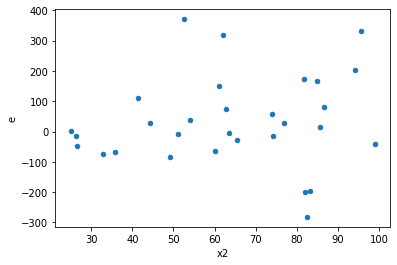

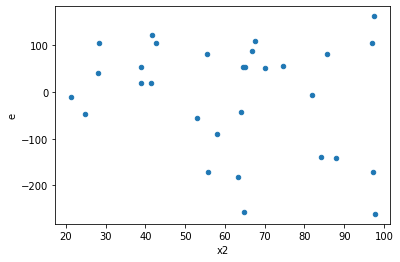

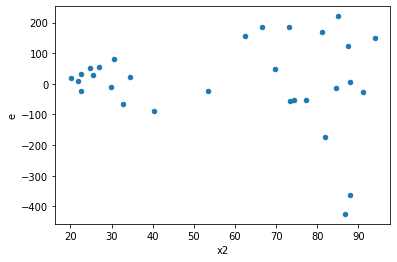

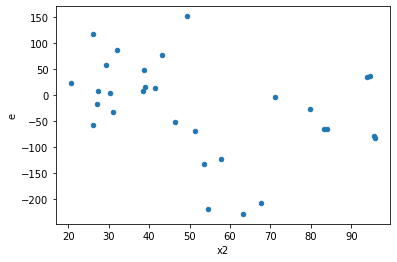

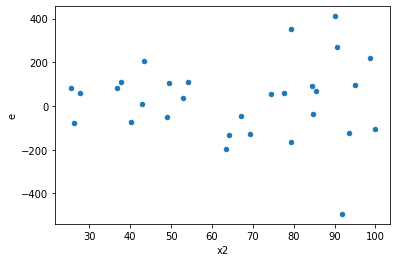

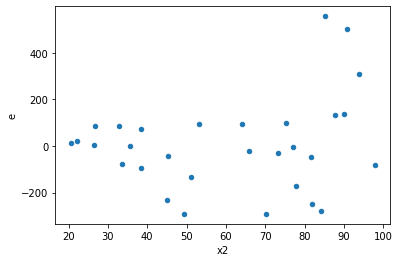

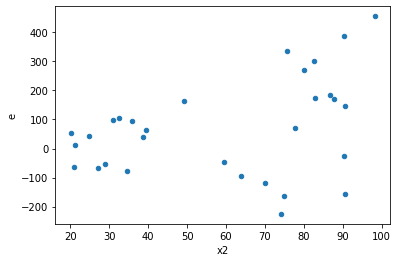

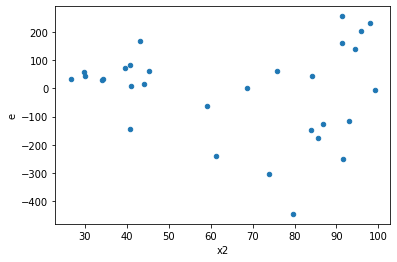

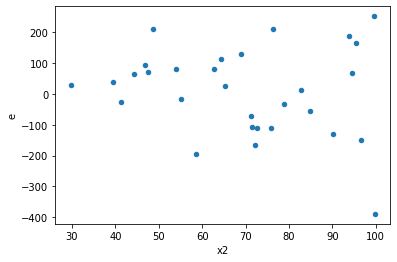

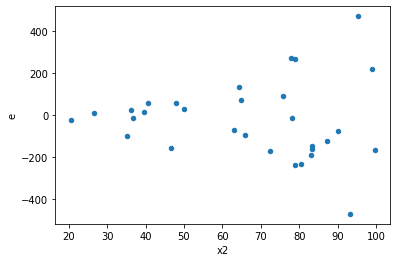

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,14.0,210893.8990108516,447711.02677548677,21089.38990108516,31979.359055391913,1.5163719389410315,0.4625363105763767,0.7687318447118117,0.23126815528818834,Reject005=1 : Homoscedasticity
3.0,10.0,14.0,161352.81295686515,281095.38777285506,16135.281295686515,20078.241983775362,1.2443688842997072,0.688894584770968,0.655552707614516,0.344447292385484,Reject005=1 : Homoscedasticity
7.0,13.0,11.0,309173.92883185326,281110.5075499985,23782.609910142557,25555.500686363503,1.0745456778259168,0.9162740271874925,0.5418629864062537,0.45813701359374626,Reject005=1 : Homoscedasticity
8.0,11.0,13.0,34375.15051442323,68020.6473250722,3125.0136831293844,5232.357486544016,1.67434706439568,0.37399706324387094,0.8130014683780645,0.18699853162193547,Reject005=1 : Homoscedasticity
9.0,9.0,15.0,140494.0250568279,618078.1938761674,15610.447228536434,41205.21292507783,2.639592083547311,0.09328905792939945,0.9533554710353003,0.04664452896469973,Reject005=1 : Homoscedasticity
12.0,10.0,14.0,17849.506704799805,452832.8701005573,1784.9506704799805,32345.205007182663,18.121063815441413,4.971865429359568e-06,0.9999975140672853,2.485932714679784e-06,Reject005=0 : Heteroscedasticity
17.0,11.0,13.0,67034.02914042101,487106.27475774166,6094.002649129183,37469.7134429032,6.14862112806228,0.002930688057312558,0.9985346559713437,0.001465344028656279,Reject005=0 : Heteroscedasticity
18.0,10.0,14.0,84170.33766197595,343596.29841805727,8417.033766197595,24542.592744146947,2.915824437191737,0.06664815353460463,0.9666759232326977,0.03332407676730231,Reject005=1 : Homoscedasticity
21.0,14.0,10.0,258047.74984165846,350312.04958272877,18431.982131547033,35031.20495827288,1.9005663475723347,0.3104502804767122,0.8447748597616439,0.1552251402383561,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,14.0,210893.8990108516,447711.02677548677,21089.38990108516,31979.359055391913,1.5163719389410315,0.4625363105763767,Reject005=1 : Homoscedasticity
1.0,17.0,7.0,551227.7257425693,99404.02130073882,32425.160337798196,14200.574471534117,0.43794924446311606,0.15585157566120914,Reject005=1 : Homoscedasticity
2.0,20.0,4.0,382911.18903136754,50557.66593405811,19145.559451568377,12639.416483514527,0.6601748314269879,0.4715830287174354,Reject005=1 : Homoscedasticity
3.0,10.0,14.0,161352.81295686515,281095.38777285506,16135.281295686515,20078.241983775362,1.2443688842997072,0.688894584770968,Reject005=1 : Homoscedasticity
4.0,10.0,14.0,326969.2651610329,61280.29079719545,32696.92651610329,4377.163628371103,0.1338707974957629,0.002982372060079895,Reject005=0 : Heteroscedasticity
5.0,13.0,11.0,213068.65063462243,93987.87053189562,16389.896202663265,8544.351866535966,0.5213182414875548,0.2636643141429877,Reject005=1 : Homoscedasticity
6.0,13.0,11.0,225691.33983777487,71804.81779377557,17360.872295213452,6527.710708525052,0.3760013090082346,0.09685428722913712,Reject005=1 : Homoscedasticity
7.0,13.0,11.0,309173.92883185326,281110.5075499985,23782.609910142557,25555.500686363503,1.0745456778259168,0.9162740271874925,Reject005=1 : Homoscedasticity
8.0,11.0,13.0,34375.15051442323,68020.6473250722,3125.0136831293844,5232.357486544016,1.67434706439568,0.37399706324387094,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      632
Reject005=0 : Heteroscedasticity    368
Name: Result_test, dtype: int64